Train inputs shape: torch.Size([2, 5, 1, 28, 28])
Train targets shape: torch.Size([2, 5])
Test inputs shape: torch.Size([2, 5, 1, 28, 28])
Test targets shape: torch.Size([2, 5])


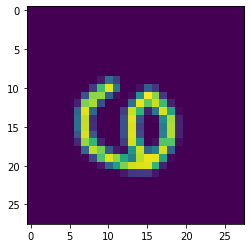

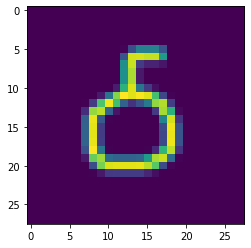

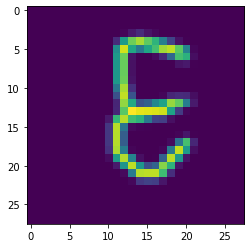

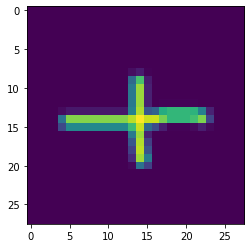

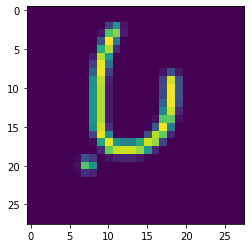

exit


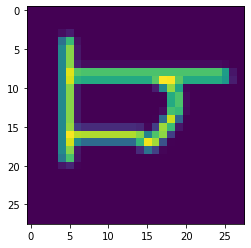

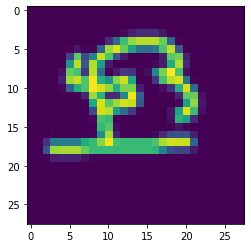

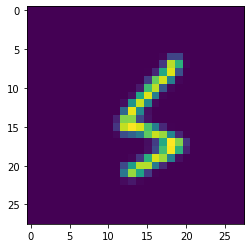

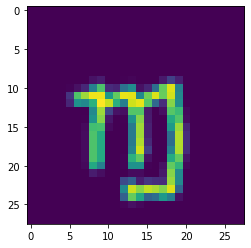

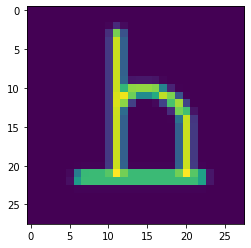

exit
torch.Size([2, 5, 1, 28, 28])


In [1]:
from torchmeta.datasets.helpers import omniglot
from torchmeta.utils.data import BatchMetaDataLoader
import matplotlib.pyplot as plt

import torchvision.transforms as transforms




dataset = omniglot("data", ways=5, shots=1, test_shots=1, meta_train=True, download=True)
dataloader = BatchMetaDataLoader(dataset, batch_size=2, num_workers=4)

for batch in dataloader:
    train_inputs, train_targets = batch["train"]
    print('Train inputs shape: {0}'.format(train_inputs.shape))    # (16, 25, 1, 28, 28)
    print('Train targets shape: {0}'.format(train_targets.shape))  # (16, 25)

    test_inputs, test_targets = batch["test"]
    print('Test inputs shape: {0}'.format(test_inputs.shape))      # (16, 75, 1, 28, 28)
    print('Test targets shape: {0}'.format(test_targets.shape))    # (16, 75)
    for outer in train_inputs:
        for inner in outer:
            plt.imshow(transforms.ToPILImage()(inner))
            plt.show()
        print('exit')
    print(train_inputs.shape)
    break

In [2]:
import pandas as pd
import tvm
import warnings
import numpy as np
warnings.filterwarnings("ignore")


In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [9]:
def pca(data):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=25)
    pca.fit(data)
    X_pca = pca.transform(data)
    return x_pca
    
class KnobsDataset(Dataset):
    """Face Landmarks dataset."""
    def __init__(self,  ways=5,shot=5,dataset_type='train', size=10000000,transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.size=size
        self.transform=transform
        self.shot=shot
        self.ways=ways
        if dataset_type=='train':
            root = '/home/jaehun/workspace/pytorch-maml/data/result1.pkl'
        elif dataset_type=='test':
            root='/home/jaehun/workspace/pytorch-maml/data/result6.pkl'
        elif dataset_type=='val':
            root='/home/jaehun/workspace/pytorch-maml/data/result8.pkl'
        else:
            raise Exception('please chice dataset type train,test and val')

        df=pd.read_pickle(root,compression='gzip')
        df['targets']=df['targets'].apply(str)
        
        _dataset=[]
        num=0
        for idx,value in df[df['targets']=='cuda -model=unknown'].groupby(['weights','strides','paddings']):
            value['idx']=num
            num+=1
            _dataset.append(value[['idx','vectors','cost']].values)
        self.dataset=np.concatenate(_dataset)
        del _dataset

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        shot=np.random.randint(0,12,5)
        ways=np.random.randint(0,30,self.ways)
        data=np.array(np.vstack(self.dataset[:,1].tolist()))
        
        labels=np.array(np.vstack(self.dataset[:,2].tolist()))
        print(self.dataset.shape,data.shape)
        data=np.vstack([data[shot*30+i] for i in ways])
        labels=np.vstack([labels[shot*30+i] for i in ways])

        if self.transform:
            data = self.transform(data)

        return (data,labels)

In [10]:
t=KnobsDataset()

In [11]:

import torch

In [12]:
t=KnobsDataset()
import torch
dataset_loader = torch.utils.data.DataLoader(t,
                                          batch_size=4, shuffle=False,
                                          num_workers=4)


In [ ]:
for i in dataset_loader:
    print(i)
    break

In [ ]:
[1]+[4,5,6]

[1, 4, 5, 6]